## Validacion con test estadístico: Welch

In [1]:
from bootstrap import * 
from statsmodels.sandbox.stats.multicomp import multipletests

Cargo los dataframes para calcular welch

In [2]:

ivalues = 'notebooks/ivalue_entropia_personas_palabras.csv'
df2 = pd.DataFrame.from_csv(ivalues,header=0,encoding='utf-8')

# listado de todas las provincias de argentina
provincias = ['jujuy',  'catamarca',  'sanjuan',  'salta',  'rionegro',  'lapampa',  'chaco',
               'mendoza',  'buenosaires',  'entrerios',  'chubut',  'santacruz',  'neuquen',
               'misiones',  'corrientes',  'formosa',  'santafe',  'santiago',  'cordoba',  'larioja',  'tierradelfuego',  'tucuman',  'sanluis']


# el path donde se encuentran los .csv con la cantidad de ocurrencias de cada palabra por cada usuario.
# hay un csv por cada provincia, con el nombre [nombreProvincia].csv
path = './dataUsuarios/filtrado/'


# leo todos los .csv de cada provincia y creo variables con los dataframes de cada provincia con su nombre respectivo.
# ej. la variable buenosaires va a tener el dataframe de buenos aires

freqs = {}
for p in provincias:
    start = datetime.datetime.now()
    freqs[p] = pd.DataFrame.from_csv(path = path+p+'.csv',encoding='utf-8') # probar con encoding='utf-8'
    end = datetime.datetime.now()
    print(p,str(end-start))



('jujuy', '0:00:06.549884')
('catamarca', '0:00:06.350146')
('sanjuan', '0:00:06.380780')
('salta', '0:00:06.032732')
('rionegro', '0:00:06.992455')
('lapampa', '0:00:06.465629')
('chaco', '0:00:06.413166')
('mendoza', '0:00:06.652098')
('buenosaires', '0:00:06.466275')
('entrerios', '0:00:06.680823')
('chubut', '0:00:07.081180')
('santacruz', '0:00:06.972605')
('neuquen', '0:00:06.557344')
('misiones', '0:00:06.700446')
('corrientes', '0:00:06.486662')
('formosa', '0:00:07.392383')
('santafe', '0:00:10.428507')
('santiago', '0:00:06.353451')
('cordoba', '0:00:07.959061')
('larioja', '0:00:07.293528')
('tierradelfuego', '0:00:07.966375')
('tucuman', '0:00:07.734272')
('sanluis', '0:00:06.536988')


In [3]:
start = datetime.datetime.now()
df3 = pd.DataFrame()
df3.loc[:,'pvalorWelch'] = df2.apply(lambda x: welch(x.name,df2,freqs,provincias),axis=1)
df3.to_csv('./testEstadisticos/welchTest.csv',encoding='utf-8')
end = datetime.datetime.now()
print("welch: ",str(end-start))

('welch: ', '0:05:55.775800')


Gráfico de pvalores respecto a la posición

In [ ]:
# agrego la posicion en base a la metrica elegida que tenia en cuenta la entropia de las palabras y de las personas

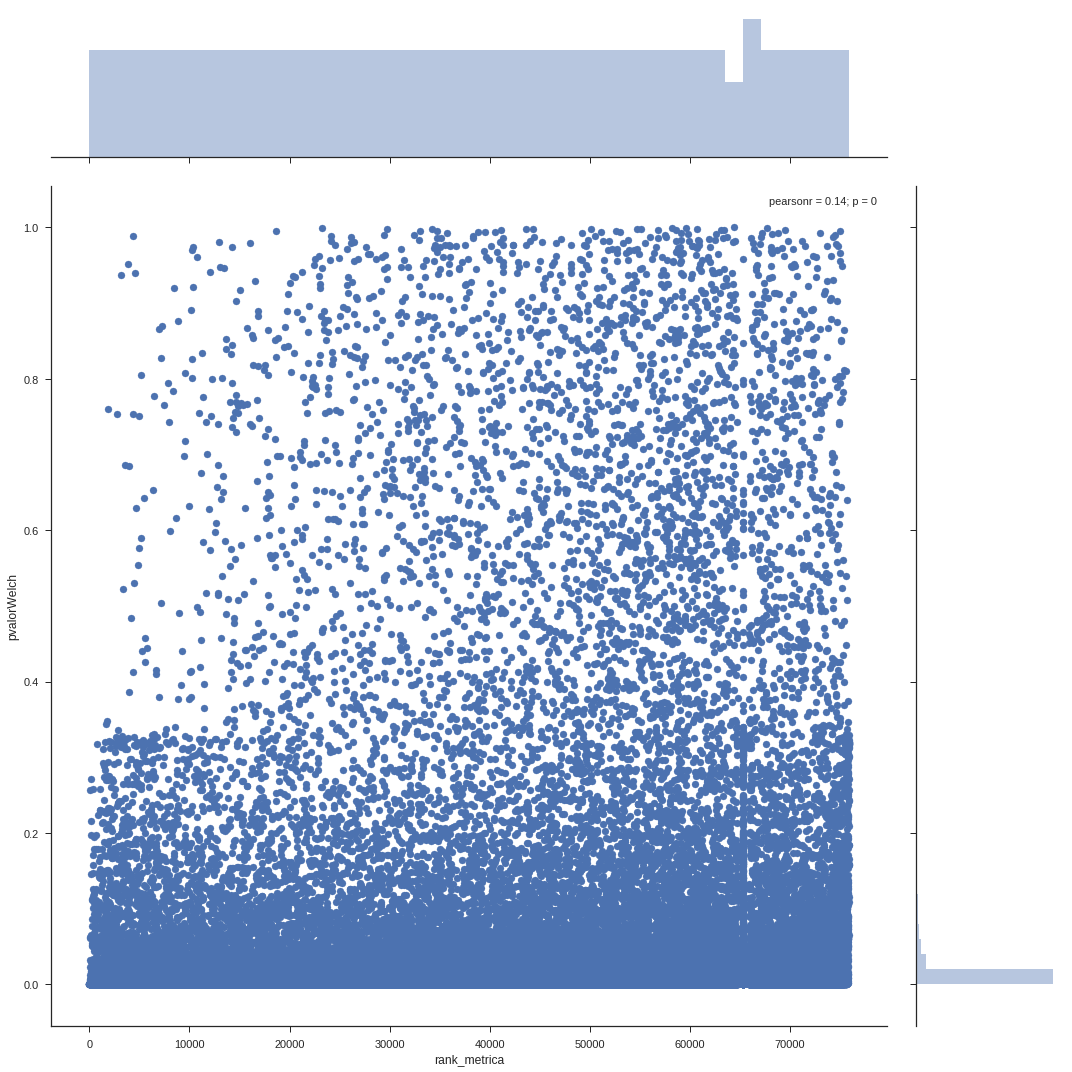

In [38]:
%matplotlib inline
df3["rank_metrica"] = df2.rankPalabras_Personas
sns.jointplot(x="rank_metrica", y="pvalorWelch", data=df3,size=15);


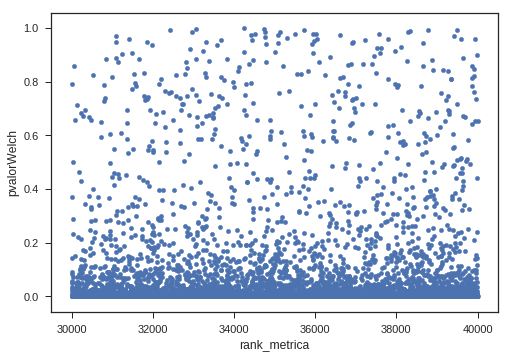

In [30]:
df3["rank_metrica"] = df2.rankPalabras_Personas
df3.iloc[30000:40000].plot.scatter(x="rank_metrica",y="pvalorWelch")
plt.show()

In [ ]:

candidatas = pd.DataFrame.from_csv("definitivo.csv",encoding="utf-8")
candidatas = candidatas[candidatas["Palabra Candidata"]=="1"].index
df4 = df3[df3[""]]
p_adjusted = multipletests(candidatas_df.pvalorWelch, method='bonferroni')[1]
df3["p_adjusted"] = p_adjusted[1]

Tasa de rechazo de $H_0$ para las palabras candidatas

In [ ]:
tasasum(p_adjusted[0])/float(len((p_adjusted[0])))*100

Las palabras candidatas que fueron rechazadas:

Las palabras candidatas que no fueron rechazadas

Tasa de rechazo de $H_0$ para todas las palabras (con más de 40 ocurrencias o dichas por más de 5 usuarios)

Histograma de p-valores Con Correción de Bonfarroni la cual rechaza la hipótesis nula para todos los $p_i$ que cumplen $ p_{i}\leq {\frac {\alpha }{m}}$, siendo m la cantidad de tests realizados

Histograma de p-valores sin corrección de Bonfarroni

In [6]:
def tasa_rechazo(pvalores,cota):
    return len(pvalores[pvalores<cota])/float(len(pvalores))

    tests = ['bootstrap','welch']
pvalores = {}
for t in tests:
    pvalores[t] = {}

for test in tests:
    for i in range(1000,30001,1000):
        if test == 'bootstrap':
            pvalor = tasa_rechazo(dfp.pvalorBootstrap.iloc[:i],0.01)
#             print("tasa de rechazo {0} {1} : ".format(test,i) + str(pvalor))
        else:
            pvalor = tasa_rechazo(dfp.pvalorWelch.iloc[:i],0.01)
#             print("tasa de rechazo {0} {1} : ".format(test,i) + str(pvalor))
        pvalores[test][i] = pvalor

NameError: name 'tests' is not defined